In [1]:
import cv2 as cv
import numpy as np
import random as rng
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [18, 10]

In [2]:
def measurements(contours):
    for i in range(len(contours)):
        cnt = contours[i]
        area = cv.contourArea(cnt)
        perimeter = cv.arcLength(cnt, True)
        print("Blob {}\t- Area: {} cm^2\tPerimetro: {} cm".format(i, round(area/100,2), round(perimeter/100,2)))

def distanceCalculate(p1, p2):
    dis=((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)**0.5
    dis=abs(dis)
    return dis

def cntDistanceCompare(contoursA, contoursB):
    minimo = -1
    for contourA in contoursA:
        for contourB in contoursB:
            distanza = distanceCalculate(contourA[0], contourB[0])
            if minimo == -1 or distanza < minimo:
                minimo = distanza
    return minimo

def cntDistanceCompare2(contoursA, contoursB):
    cumMinDistList = []
    for contourA in contoursA:
        indMinDistList = []
        for contourB in contoursB:
            minDist = distanceCalculate(contourA[0], contourB[0])
            indMinDistList.append(minDist)
        cumMinDistList.append(min(indMinDistList))
    return min(cumMinDistList)

## Original Image

dtype: uint8
shape: (538, 2360, 3)


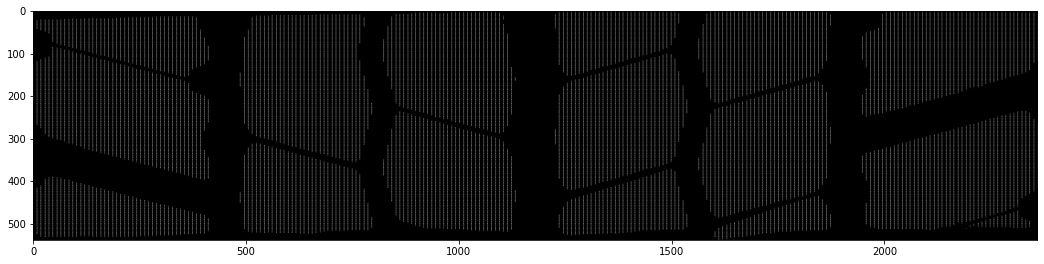

In [3]:
src = cv.imread("_image.jpg")

# Show in a window
print("dtype: {}".format(src.dtype))
print("shape: {}".format(src.shape))
plt.imshow(src)
plt.show()

## BLOB - Morphological Transformations - Closing

dtype: uint8
shape: (538, 2360, 3)


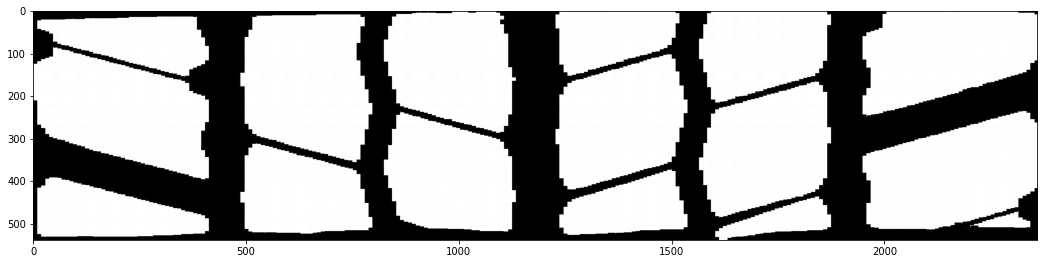

In [4]:
kernel_blob = np.ones((5,10), np.uint8)
closing_blob = cv.morphologyEx(src, cv.MORPH_CLOSE, kernel_blob)

# Show in a window
print("dtype: {}".format(closing_blob.dtype))
print("shape: {}".format(closing_blob.shape))
plt.imshow(closing_blob)
plt.show()

## MACRO_BLOB - Morphological Transformations - Closing


dtype: uint8
shape: (538, 2360, 3)


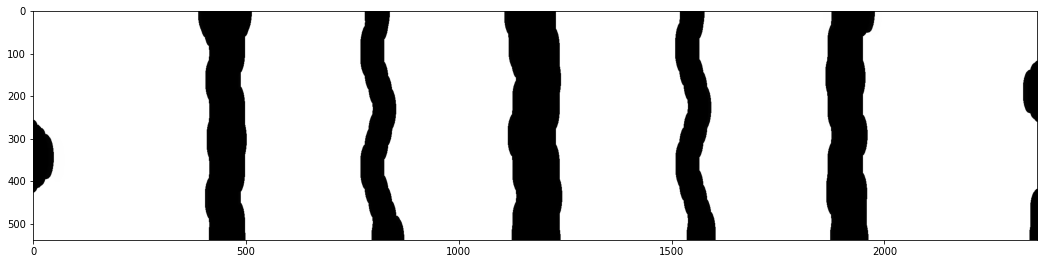

In [5]:
closing_macro_blob = cv.morphologyEx(closing_blob, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE, (30,100)))

# Show in a window
print("\ndtype: {}".format(closing_macro_blob.dtype))
print("shape: {}".format(closing_macro_blob.shape))
plt.imshow(closing_macro_blob)
plt.show()

## MACRO_BLOB - Contour Detection


dtype: uint8
shape: (538, 2360)


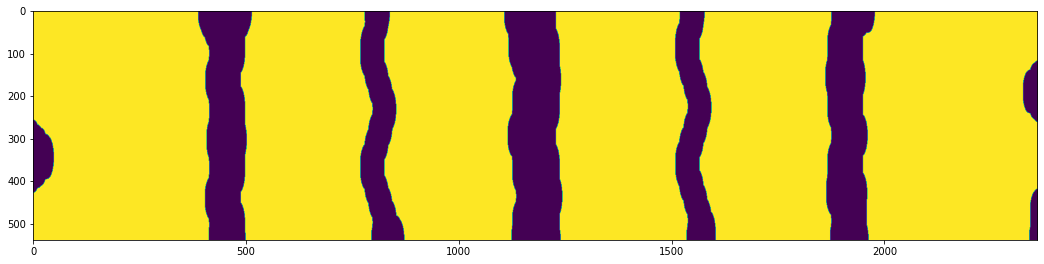

In [6]:
# convert the image to grayscale format
img_gray_macro_blob = cv.cvtColor(closing_macro_blob, cv.COLOR_BGR2GRAY)

# apply binary thresholding
ret_macro_blob, thresh_macro_blob = cv.threshold(img_gray_macro_blob, 150, 255, cv.THRESH_BINARY)

# Show in a window
print("\ndtype: {}".format(thresh_macro_blob.dtype))
print("shape: {}".format(thresh_macro_blob.shape))
plt.imshow(thresh_macro_blob)
plt.show()

Blob trovati: 6

dtype: uint8
shape: (538, 2360, 3)


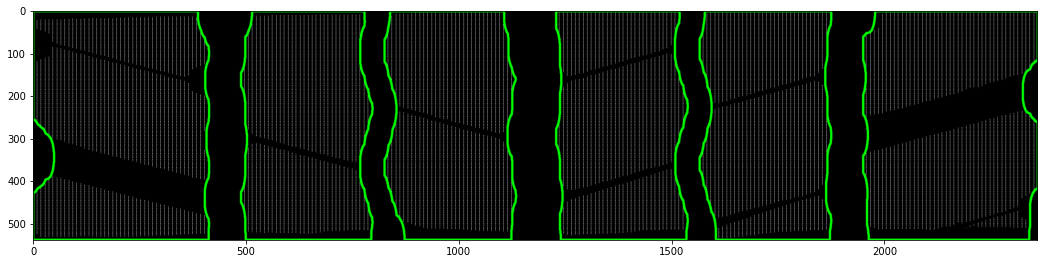


dtype: uint8
shape: (538, 2360, 3)


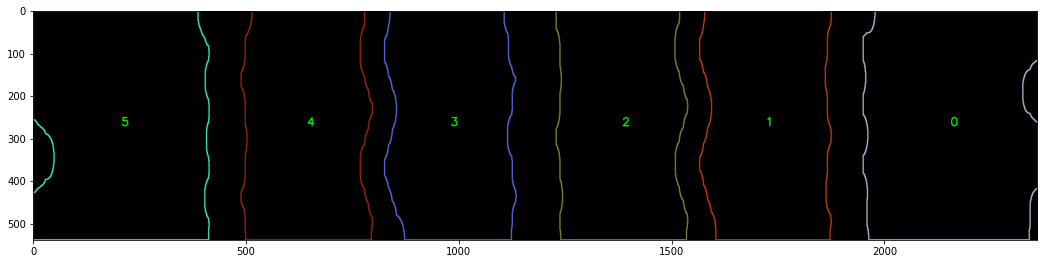

In [7]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
_, contours_macro_blob, hierarchy_macro_blob = cv.findContours(image=thresh_macro_blob, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
print("Blob trovati: {}\n".format(len(contours_macro_blob)))


# draw contours on the original image
src_copy_macro_blob = src.copy()
cv.drawContours(image=src_copy_macro_blob, contours=contours_macro_blob, contourIdx=-1, color=(0, 255, 0), thickness=3, lineType=cv.LINE_AA)

# Show in a window
print("dtype: {}".format(src_copy_macro_blob.dtype))
print("shape: {}".format(src_copy_macro_blob.shape))
plt.imshow(src_copy_macro_blob)
plt.show()


# draw only contours
drawing_macro_blob = np.zeros((thresh_macro_blob.shape[0], thresh_macro_blob.shape[1], 3), dtype=np.uint8)
for i in range(len(contours_macro_blob)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(drawing_macro_blob, contours_macro_blob, i, color, 2, cv.LINE_8, hierarchy_macro_blob, 0)
    x,y,w,h = cv.boundingRect(contours_macro_blob[i])
    cv.putText(drawing_macro_blob, "{}".format(i), (int(x+(w/2)), int(y+(h/2))), cv.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

# Show in a window
print("\ndtype: {}".format(drawing_macro_blob.dtype))
print("shape: {}".format(drawing_macro_blob.shape))
plt.imshow(drawing_macro_blob)
plt.show()

## MACRO_BLOB - Area and Perimeter Measurements

In [8]:
measurements(contours_macro_blob)

Blob 0	- Area: 2104.39 cm^2	Perimetro: 19.16 cm
Blob 1	- Area: 1536.12 cm^2	Perimetro: 17.06 cm
Blob 2	- Area: 1525.26 cm^2	Perimetro: 17.21 cm
Blob 3	- Area: 1507.82 cm^2	Perimetro: 16.74 cm
Blob 4	- Area: 1516.1 cm^2	Perimetro: 17.02 cm
Blob 5	- Area: 2123.83 cm^2	Perimetro: 19.58 cm


## BLOB - Contour Detection

dtype: uint8
shape: (538, 2360)


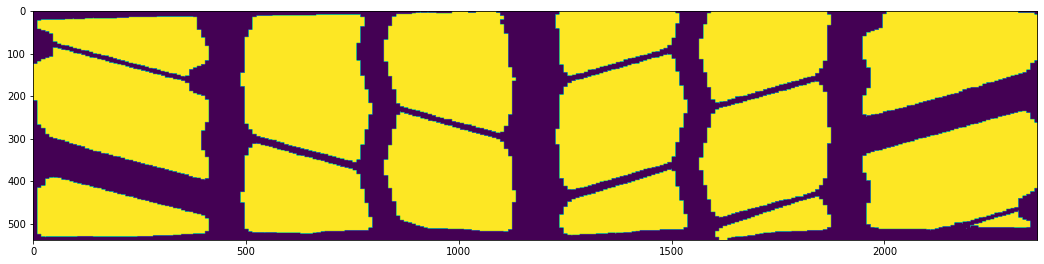

In [9]:
# convert the image to grayscale format
img_gray_blob = cv.cvtColor(closing_blob, cv.COLOR_BGR2GRAY)

# apply binary thresholding
ret_blob, thresh_blob = cv.threshold(img_gray_blob, 150, 255, cv.THRESH_BINARY)

# Show in a window
print("dtype: {}".format(thresh_blob.dtype))
print("shape: {}".format(thresh_blob.shape))
plt.imshow(thresh_blob)
plt.show()

Blob trovati: 17

dtype: uint8
shape: (538, 2360, 3)


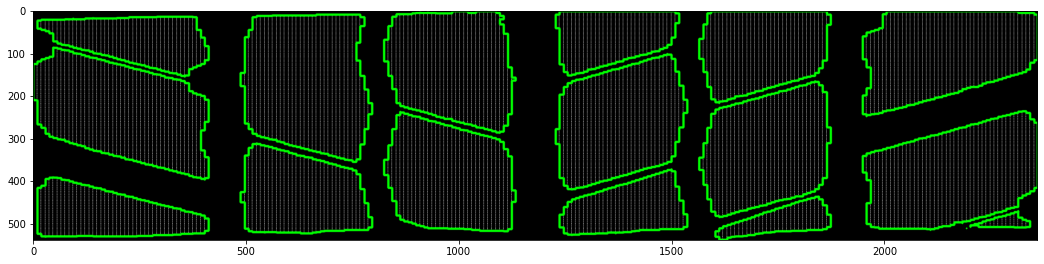


dtype: uint8
shape: (538, 2360, 3)


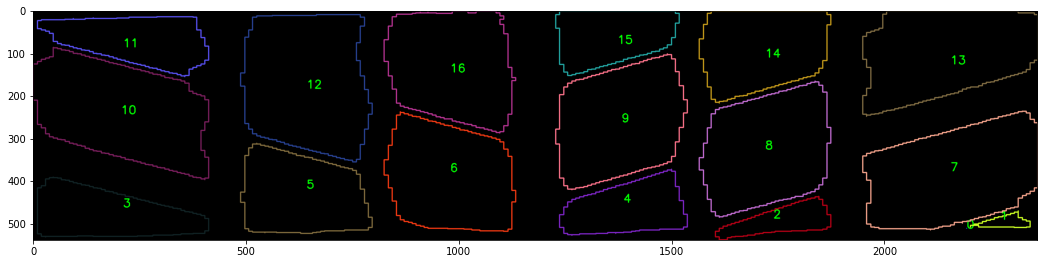

In [10]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
_, contours_blob, hierarchy_blob = cv.findContours(image=thresh_blob, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
print("Blob trovati: {}\n".format(len(contours_blob)))


# draw contours on the original image
src_copy_blob = src.copy()
cv.drawContours(image=src_copy_blob, contours=contours_blob, contourIdx=-1, color=(0, 255, 0), thickness=3, lineType=cv.LINE_AA)

# Show in a window
print("dtype: {}".format(src_copy_blob.dtype))
print("shape: {}".format(src_copy_blob.shape))
plt.imshow(src_copy_blob)
plt.show()


# draw only contours
drawing_blob = np.zeros((thresh_blob.shape[0], thresh_blob.shape[1], 3), dtype=np.uint8)
for i in range(len(contours_blob)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(drawing_blob, contours_blob, i, color, 2, cv.LINE_8, hierarchy_blob, 0)
    x,y,w,h = cv.boundingRect(contours_blob[i])
    cv.putText(drawing_blob, "{}".format(i), (int(x+(w/2)), int(y+(h/2))), cv.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

# Show in a window
print("\ndtype: {}".format(drawing_blob.dtype))
print("shape: {}".format(drawing_blob.shape))
plt.imshow(drawing_blob)
plt.show()

## BLOB - Area and Perimeter Measurements

In [11]:
measurements(contours_blob)

Blob 0	- Area: 0.0 cm^2	Perimetro: 0.0 cm
Blob 1	- Area: 26.52 cm^2	Perimetro: 3.55 cm
Blob 2	- Area: 134.94 cm^2	Perimetro: 7.2 cm
Blob 3	- Area: 376.6 cm^2	Perimetro: 10.54 cm
Blob 4	- Area: 306.29 cm^2	Perimetro: 8.86 cm
Blob 5	- Area: 496.95 cm^2	Perimetro: 10.17 cm
Blob 6	- Area: 666.12 cm^2	Perimetro: 11.5 cm
Blob 7	- Area: 832.61 cm^2	Perimetro: 13.59 cm
Blob 8	- Area: 715.62 cm^2	Perimetro: 12.2 cm
Blob 9	- Area: 712.47 cm^2	Perimetro: 12.17 cm
Blob 10	- Area: 837.29 cm^2	Perimetro: 14.28 cm
Blob 11	- Area: 360.19 cm^2	Perimetro: 10.59 cm
Blob 12	- Area: 861.27 cm^2	Perimetro: 13.22 cm
Blob 13	- Area: 753.05 cm^2	Perimetro: 13.22 cm
Blob 14	- Area: 518.58 cm^2	Perimetro: 10.28 cm
Blob 15	- Area: 323.83 cm^2	Perimetro: 8.63 cm
Blob 16	- Area: 694.75 cm^2	Perimetro: 12.04 cm


## MACRO_BLOB - BLOB - Distance

In [12]:
for i in range(len(contours_macro_blob)):
    for j in range(len(contours_blob)):
        for k in range(len(contours_blob)):
            x1 = contours_blob[j][0][0][0]
            y1 = contours_blob[j][0][0][1]
            x2 = contours_blob[k][0][0][0]
            y2 = contours_blob[k][0][0][1]
            ppt1 = cv.pointPolygonTest(contours_macro_blob[i], (x1,y1), False) # Returns +1, -1, or 0 to indicate if a point is inside, outside, or on the contour
            ppt2 = cv.pointPolygonTest(contours_macro_blob[i], (x2,y2), False)
            if (ppt1 == 0 or ppt1 == 1) and (ppt2 == 0 or ppt2 == 1) and j != k:
                d = cntDistanceCompare(contours_blob[j], contours_blob[k])
                print("MacroBlob {} -- Blob {} - Blob {} -- Distanza: {} cm".format(i, j, k, round(d/100,2)))

MacroBlob 0 -- Blob 0 - Blob 1 -- Distanza: 0.09 cm
MacroBlob 0 -- Blob 0 - Blob 7 -- Distanza: 0.16 cm
MacroBlob 0 -- Blob 0 - Blob 13 -- Distanza: 3.12 cm
MacroBlob 0 -- Blob 1 - Blob 0 -- Distanza: 0.09 cm
MacroBlob 0 -- Blob 1 - Blob 7 -- Distanza: 0.08 cm
MacroBlob 0 -- Blob 1 - Blob 13 -- Distanza: 3.05 cm
MacroBlob 0 -- Blob 7 - Blob 0 -- Distanza: 0.16 cm
MacroBlob 0 -- Blob 7 - Blob 1 -- Distanza: 0.08 cm
MacroBlob 0 -- Blob 7 - Blob 13 -- Distanza: 0.79 cm
MacroBlob 0 -- Blob 13 - Blob 0 -- Distanza: 3.12 cm
MacroBlob 0 -- Blob 13 - Blob 1 -- Distanza: 3.05 cm
MacroBlob 0 -- Blob 13 - Blob 7 -- Distanza: 0.79 cm
MacroBlob 1 -- Blob 2 - Blob 8 -- Distanza: 0.09 cm
MacroBlob 1 -- Blob 2 - Blob 14 -- Distanza: 2.72 cm
MacroBlob 1 -- Blob 8 - Blob 2 -- Distanza: 0.09 cm
MacroBlob 1 -- Blob 8 - Blob 14 -- Distanza: 0.11 cm
MacroBlob 1 -- Blob 14 - Blob 2 -- Distanza: 2.72 cm
MacroBlob 1 -- Blob 14 - Blob 8 -- Distanza: 0.11 cm
MacroBlob 2 -- Blob 4 - Blob 9 -- Distanza: 0.15 cm
Ma

In [13]:
prova = src.copy()

# Straight Bounding Rectangle
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(prova,(x,y),(x+w,y+h),(0,255,0),2)
cv.putText(prova, 'Bound', (x+30, y+30), cv.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

# Rotated Rectangle
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(prova,[box],0,(0,255,0),2)

plt.imshow(prova)
plt.show()

NameError: name 'cnt' is not defined